### Question 3-6 - Details

    The National Traffic Study Institute is conducting a study to find out the relationship between the speed at which the car is moving and the
    distance it takes to stop after applying the brakes. You were hired as a statistician to work on this problem. The data can be accessed as follows:

    install.packages(“Ecdat”)
    library(Ecdat)
    data(cars)

    You can easily see that these are the variables present in the dataset and the corresponding units using help command on R console – speed (in mph) 
    and dist (in ft).
    Use this dataset for the following 4 questions.

In [1]:
# install.packages(“Ecdat”)
library(Ecdat)
library(tidyverse) 
data(cars)

Loading required package: Ecfun

Attaching package: ‘Ecfun’

The following object is masked from ‘package:base’:

    sign


Attaching package: ‘Ecdat’

The following object is masked from ‘package:datasets’:

    Orange

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
?cars

cars                 package:datasets                  R Documentation

_S_p_e_e_d _a_n_d _S_t_o_p_p_i_n_g _D_i_s_t_a_n_c_e_s _o_f _C_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data give the speed of cars and the distances taken to stop.
     Note that the data were recorded in the 1920s.

_U_s_a_g_e:

     cars
     
_F_o_r_m_a_t:

     A data frame with 50 observations on 2 variables.

       [,1]  speed  numeric  Speed (mph)            
       [,2]  dist   numeric  Stopping distance (ft) 
      
_S_o_u_r_c_e:

     Ezekiel, M. (1930) _Methods of Correlation Analysis_.  Wiley.

_R_e_f_e_r_e_n_c_e_s:

     McNeil, D. R. (1977) _Interactive Data Analysis_.  Wiley.

_E_x_a_m_p_l_e_s:

     require(stats); require(graphics)
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1)
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     title(main = "cars data")
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
          las = 1, log = "xy")
     title(main = "cars data (logarithmic scales)")
     lines(lowess(cars$speed, cars$dist, f = 2/3, iter = 3), col = "red")
     summary(fm1 <- lm(log(dist) ~ log(speed), data = cars))
     opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0),
                 mar = c(4.1, 4.1, 2.1, 1.1))
     plot(fm1)
     par(opar)
     
     ## An example of polynomial regression
     plot(cars, xlab = "Speed (mph)", ylab = "Stopping distance (ft)",
         las = 1, xlim = c(0, 25))
     d <- seq(0, 25, length.out = 200)
     for(degree in 1:4) {
       fm <- lm(dist ~ poly(speed, degree), data = cars)
       assign(paste("cars", degree, sep = "."), fm)
       lines(d, predict(fm, data.frame(speed = d)), col = degree)
     }
     anova(cars.1, cars.2, cars.3, cars.4)

#### Question 3
    5.0/5.0 points (graded)
    Let’s try to find out if there is a correlation between the distance needed to stop and the speed at which the car is moving. What correlation value 
    do you find when doing this in R?

#### Ques 6.    
    Now, let’s fit a linear model with distance needed to stop as the response(dependent) and speed as the predictor(independent). 
    What is the percent variation(R2) explained by speed, intercept, and coefficient of speed?

In [3]:
a.lm <- lm(formula = dist ~ speed , data = cars)
a.lm
summary(a.lm)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


    ( 0.6511,-17.5791,3.9324 )

#### Question 6
    0.0/5.0 points (graded)
    Now suppose we need to change the units of distance needed to stop from feet to meters and speed from mph to meters per second because 
    we need the results to be standard units. What would be the results for percent variation explained by speed, intercept, and coefficient of speed?

In [9]:
cars<- cars %>%
  mutate(dist_m = dist * 0.3048) %>%
  mutate(speed_ms = speed * 0.44704)

In [10]:
a.lm <- lm(formula = dist_m ~ speed_ms , data = cars)
a.lm
summary(a.lm)


Call:
lm(formula = dist_m ~ speed_ms, data = cars)

Coefficients:
(Intercept)     speed_ms  
     -5.358        2.681  



Call:
lm(formula = dist_m ~ speed_ms, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8603 -2.9033 -0.6925  2.8086 13.1678 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.3581     2.0600  -2.601   0.0123 *  
speed_ms      2.6812     0.2833   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.688 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


    (0.6511, -5.3581, 2.6812 )

In [33]:
library(MASS)
dat <- Boston
head(dat, 5)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
m.lm <- lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + tax + ptratio + black + lstat , data = dat)
m.lm
summary(m.lm)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = dat)

Coefficients:
(Intercept)         crim           zn         chas          nox           rm  
  36.341145    -0.108413     0.045845     2.718716   -17.376023     3.801579  
        dis          rad          tax      ptratio        black        lstat  
  -1.492711     0.299608    -0.011778    -0.946525     0.009291    -0.522553  



Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0

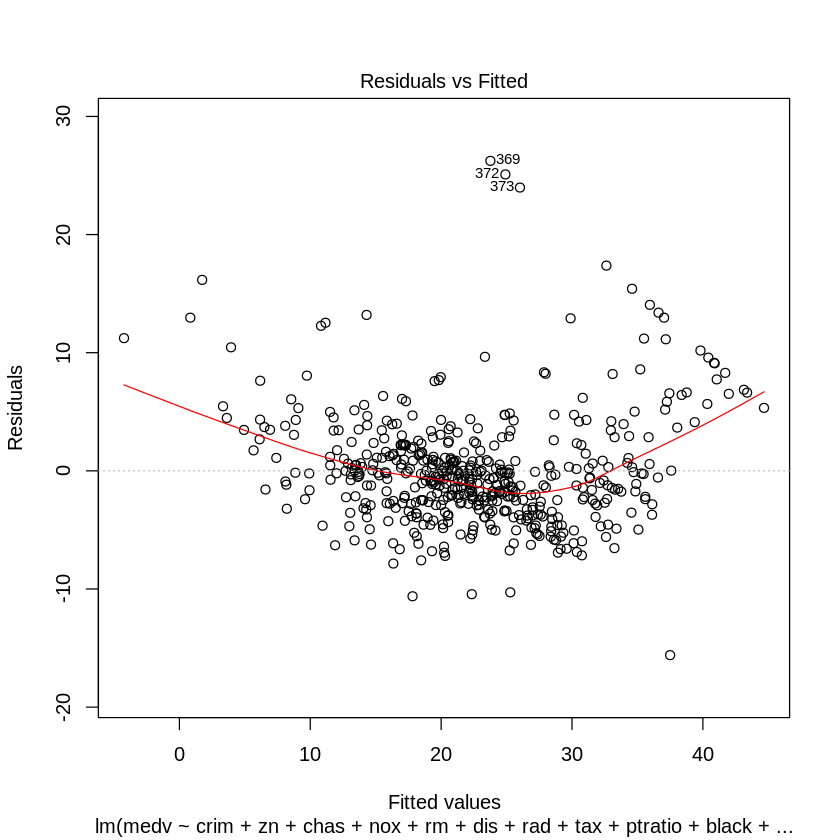

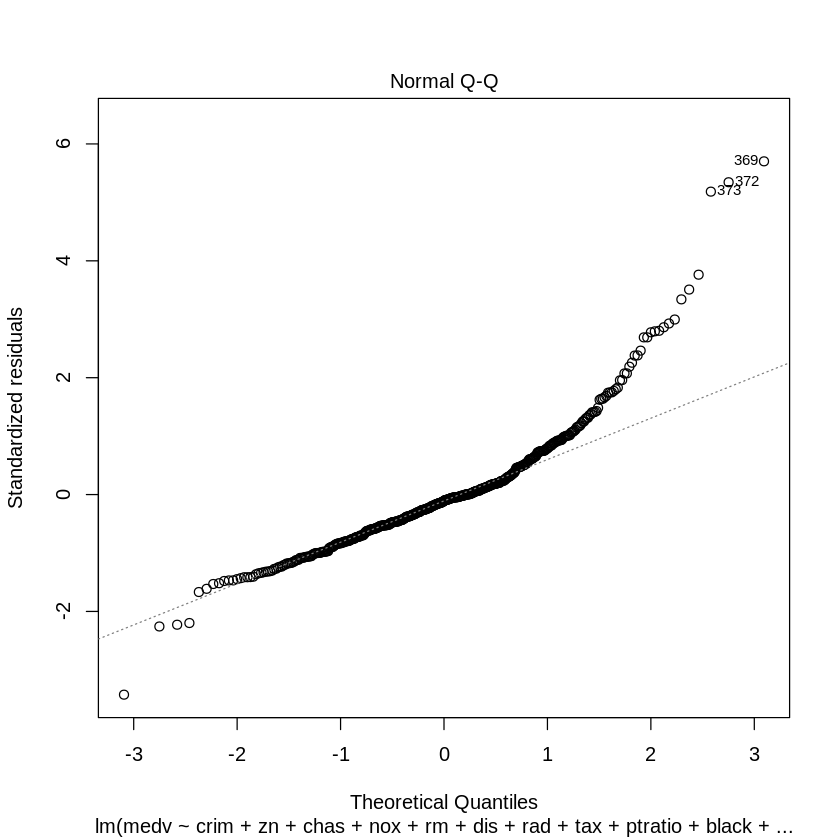

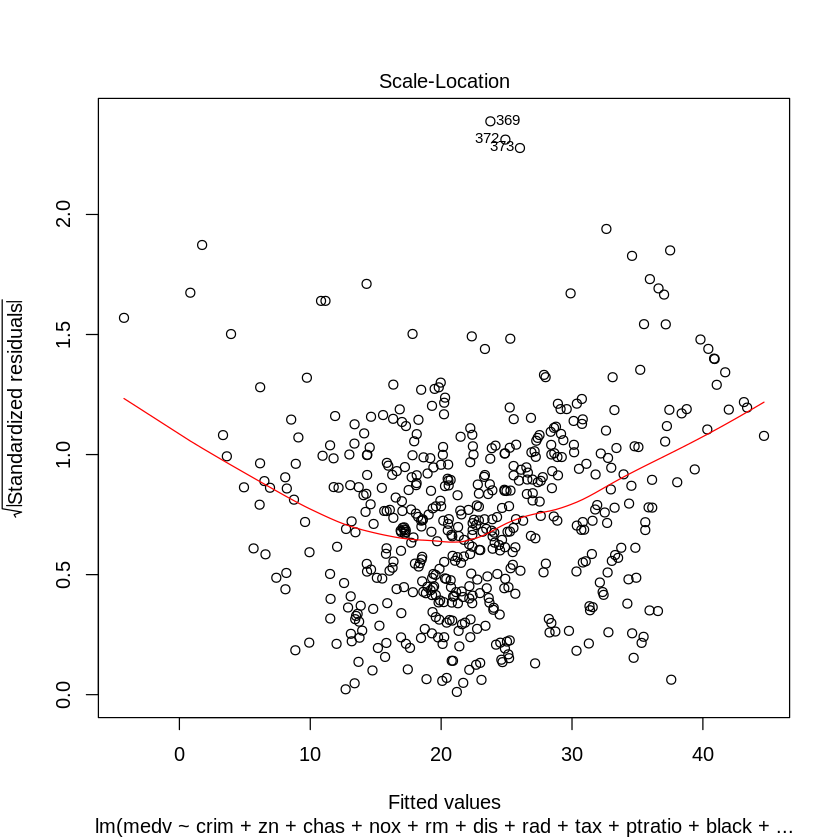

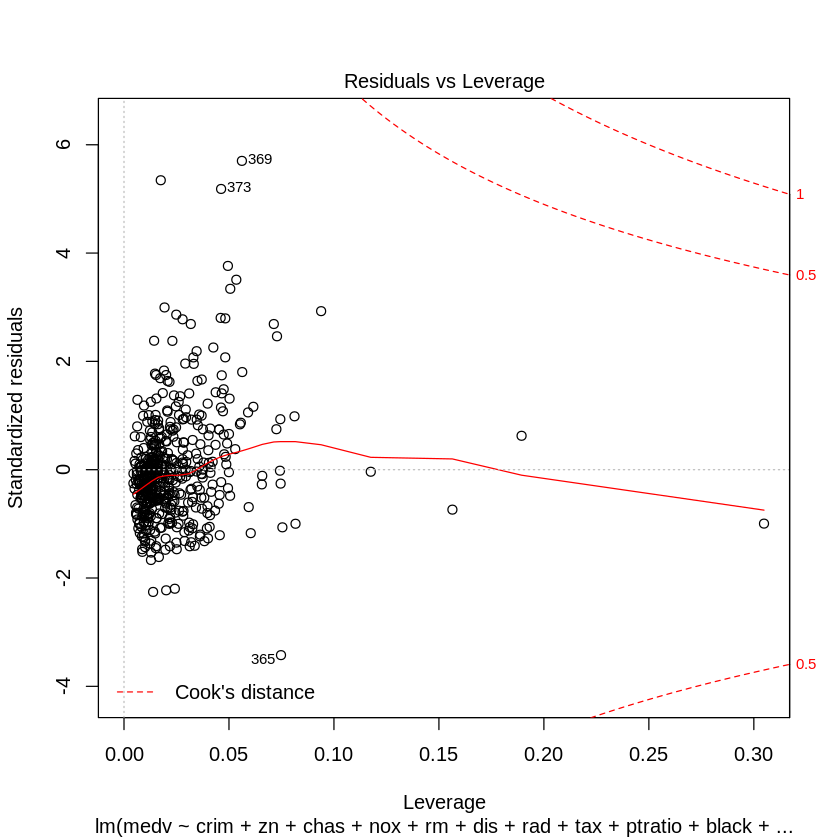

In [36]:
plot( m.lm )

In [37]:
shapiro.test(residuals(m.lm))


	Shapiro-Wilk normality test

data:  residuals(m.lm)
W = 0.90131, p-value < 2.2e-16


In [42]:
install.packages("lmtest")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [44]:
library
dwtest(lmtest)

ERROR: Error in dwtest(lmtest): object 'lmtest' not found


In [22]:
install.packages("car")
library(car)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: carData

Attaching package: ‘carData’

The following object is masked from ‘package:Ecdat’:

    Mroz


Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some



In [24]:
Salaries_dataset = as_tibble(Salaries)

In [26]:
head(Salaries_dataset, 5)

rank,discipline,yrs.since.phd,yrs.service,sex,salary
Prof,B,19,18,Male,139750
Prof,B,20,16,Male,173200
AsstProf,B,4,3,Male,79750
Prof,B,45,39,Male,115000
Prof,B,40,41,Male,141500


In [27]:
Salaries_dataset<- Salaries_dataset %>%
  mutate(AssocProf = ifelse(rank=="AsstProf",1,0)) %>%
  mutate(Prof = ifelse(rank=="Prof",1,0))

In [28]:
head(Salaries_dataset, 5)

rank,discipline,yrs.since.phd,yrs.service,sex,salary,AssocProf,Prof
Prof,B,19,18,Male,139750,0,1
Prof,B,20,16,Male,173200,0,1
AsstProf,B,4,3,Male,79750,1,0
Prof,B,45,39,Male,115000,0,1
Prof,B,40,41,Male,141500,0,1


In [29]:
# Salary = b0 + b1* Years.service + b2*AssocProf (dummy variable) + b3*Prof (dummy variable)
m.lm <- lm(formula = salary ~ yrs.service + AssocProf + Prof , data = Salaries_dataset)
m.lm
summary(m.lm)


Call:
lm(formula = salary ~ yrs.service + AssocProf + Prof, data = Salaries_dataset)

Coefficients:
(Intercept)  yrs.service    AssocProf         Prof  
    95766.6       -158.1     -14615.4      34613.4  



Call:
lm(formula = salary ~ yrs.service + AssocProf + Prof, data = Salaries_dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-64515 -16180  -1234  12181 107174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  95766.6     3255.1  29.421  < 2e-16 ***
yrs.service   -158.1      115.0  -1.376 0.169708    
AssocProf   -14615.4     4270.6  -3.422 0.000686 ***
Prof         34613.4     3515.9   9.845  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23610 on 393 degrees of freedom
Multiple R-squared:  0.3972,	Adjusted R-squared:  0.3926 
F-statistic:  86.3 on 3 and 393 DF,  p-value: < 2.2e-16


#### For the below questions, please use the data file EDSAL.csv.

    Download the EDSAL.csv file (link: https://www.dropbox.com/s/gdwpbkdw72oq4mm/EDSAL.csv?dl=0) and upload it to a dataframe (in R).
    The three variables are Education, Experience and Salary. Code to load the data set is as follows:

    > EDSAL = read.csv("EDSAL.csv", header = TRUE)

    Run 4 linear regressions using the lm function in R. (note – you have to use the natural log)

    •          Lin-Lin: Use Salary as the dependent variable and Experience as the independent variable.

    •          Lin-Log: Use Salary as the dependent variable and log(Experience) as the independent variable.

    •          Log-Lin: Use log(Salary) as the dependent variable and Experience as the independent variable.

    •          Log-Log: Use log(Salary) as the dependent variable and log(Experience) as the independent variable.

#### Question 17
    0.0/5.0 points (graded)
    For which of following situations are we most likely to consider log transformation?

In [11]:
EDSAL = read.csv("EDSAL.csv", header = TRUE)

In [12]:
head(EDSAL, 4)

Education,Experience,Salary
HS,2,34.43222
HS,14,59.15737
HS,36,113.27017
HS,16,69.14739


In [13]:
EDSAL <- EDSAL %>%
  mutate(Ln_Salary = log(EDSAL$Salary)) %>%
  mutate(Ln_Experience = log(EDSAL$Experience))

In [14]:
head(EDSAL, 4)

Education,Experience,Salary,Ln_Salary,Ln_Experience
HS,2,34.43222,3.538993,0.6931472
HS,14,59.15737,4.080201,2.6390573
HS,36,113.27017,4.729776,3.5835189
HS,16,69.14739,4.236240,2.7725887


In [15]:
# linear - linear
a.lm <- lm(formula = Salary ~ Experience  , data = EDSAL)
a.lm
summary(a.lm)


Call:
lm(formula = Salary ~ Experience, data = EDSAL)

Coefficients:
(Intercept)   Experience  
     29.468        3.096  



Call:
lm(formula = Salary ~ Experience, data = EDSAL)

Residuals:
   Min     1Q Median     3Q    Max 
-73.00 -12.82  -1.18  13.32  60.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  29.4679     2.5673   11.48   <2e-16 ***
Experience    3.0959     0.1113   27.81   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.05 on 298 degrees of freedom
Multiple R-squared:  0.7218,	Adjusted R-squared:  0.7209 
F-statistic: 773.2 on 1 and 298 DF,  p-value: < 2.2e-16


In [16]:
# linear log
b.lm <- lm(formula = Salary ~ Ln_Experience  , data = EDSAL)
b.lm
summary(b.lm)


Call:
lm(formula = Salary ~ Ln_Experience, data = EDSAL)

Coefficients:
  (Intercept)  Ln_Experience  
       -1.991         34.985  



Call:
lm(formula = Salary ~ Ln_Experience, data = EDSAL)

Residuals:
    Min      1Q  Median      3Q     Max 
-61.700 -21.895  -5.022  16.730  84.879 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.991      4.768  -0.418    0.677    
Ln_Experience   34.985      1.704  20.529   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.35 on 298 degrees of freedom
Multiple R-squared:  0.5858,	Adjusted R-squared:  0.5844 
F-statistic: 421.5 on 1 and 298 DF,  p-value: < 2.2e-16


In [18]:
# log- linear
c.lm <- lm(formula = Ln_Salary ~ Experience  , data = EDSAL)
c.lm
summary(c.lm)


Call:
lm(formula = Ln_Salary ~ Experience, data = EDSAL)

Coefficients:
(Intercept)   Experience  
    3.64018      0.03709  



Call:
lm(formula = Ln_Salary ~ Experience, data = EDSAL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51651 -0.17318  0.02534  0.19444  0.53280 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.640177   0.029106  125.07   <2e-16 ***
Experience  0.037087   0.001262   29.38   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2727 on 298 degrees of freedom
Multiple R-squared:  0.7434,	Adjusted R-squared:  0.7425 
F-statistic: 863.2 on 1 and 298 DF,  p-value: < 2.2e-16


In [20]:
# log - log
d.lm <- lm(formula = Ln_Salary ~ Ln_Experience  , data = EDSAL)
d.lm
summary(d.lm)


Call:
lm(formula = Ln_Salary ~ Ln_Experience, data = EDSAL)

Coefficients:
  (Intercept)  Ln_Experience  
       3.1577         0.4595  



Call:
lm(formula = Ln_Salary ~ Ln_Experience, data = EDSAL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99692 -0.19914 -0.00272  0.20315  0.72587 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3.15767    0.04584   68.88   <2e-16 ***
Ln_Experience  0.45949    0.01638   28.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2822 on 298 degrees of freedom
Multiple R-squared:  0.7252,	Adjusted R-squared:  0.7243 
F-statistic: 786.5 on 1 and 298 DF,  p-value: < 2.2e-16
